# Week 1

## Overview
As explained in the [Before week 1: How to take this class](https://nbviewer.org/github/suneman/socialdata2022/blob/main/lectures/How_To_Take_This_Class.ipynb) notebook, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

**Hint**: And you can ask us for help at any point if you get stuck!

## Today

This first lecture will go over a few different topics to get you started 

* First, I'll explain a little bit about what we'll be doing this year (hint, you may want to watch _Minority Report_ if you want to prepare deeply for the class 😊).
* Second, we'll start by loading some real-world data into your very own computers and getting started with some data analysis.

## Part 1: Predictive policing. A case to learn from

For a number of years I've been a little bit obsessed with [predictive policing](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens). I guess there are various reasons. For example:

* I think it's an interesting application of data science. 
* It connects to popular culture in a big way. Both through TV shows, such as [NUMB3RS](https://en.wikipedia.org/wiki/Numbers_(TV_series)) (it also features in Bones ... or any of the CSI), and also any number of movies, my favorite of which has to be [Minority report](https://www.imdb.com/title/tt0181689/).
* Predictive policing is also big business. Companies like [PredPol](https://www.predpol.com), [Palantir](https://www.theverge.com/2018/2/27/17054740/palantir-predictive-policing-tool-new-orleans-nopd), and many other companies offer their services law enforcement by analyzing crime data. 
* It hints at the dark sides of Data Science. In these algorithms, concepts like [bias, fairness, and accountability](https://www.smithsonianmag.com/innovation/artificial-intelligence-is-now-used-predict-crime-is-it-biased-180968337/) become incredibly important when the potential outcome of an algorithm is real people going to prison.  
* And, finally there's lots of data available!! Chicago, NYC, and San Francisco all have crime data available freely online.

Below is a little video to pique your interest. 

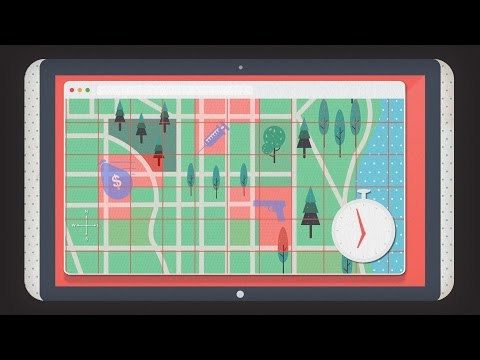

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("YxvyeaL7NEM",width=800, height=450)

All this is to say that in the coming weeks, we'll be working to understand crime in San Francisco. We'll be using the SF crime data as a basis for our work on data analysis and data visualization. 

We will draw on data from the project [SF OpenData](https://data.sfgov.org), looking into SFPD incidents which have been recorded back since January 2003.

*Reading*

Read [this article](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens) from science magazine to get a bit deeper sense of the topic.


> *Exercise*
> 
> Answer the following questions in your own words
> 
> * According to the article, is predictive policing better than best practice techniques for law enforcement? The article is from 2016. Take a look around the web, does this still seem to be the case in 2020? (hint, when you evaluate the evidence consider the source)
> * List and explain some of the possible issues with predictive policing according to the article. 

# Part 2: Load some crime-data into `pandas`

Go and check out the [Python Bootcamp](https://nbviewer.org/github/suneman/socialdata2022/blob/main/lectures/PythonBootcamp.ipynb) lecture if you don't know what "loading data into Pandas" means. If you're used to using Pandas, then it's finally time to get your hands on some data!!

> *Exercise 1*
>
> * Go to https://datasf.org/opendata/
> * Click on "Public Safety"
> * Download all police incidence reports, historical 2003 to may 2018. You can get everything as a big CSV file if you press the *Export* button (it's a snappy little ~500MB file).
> * Load the data into `pandas` using thie tips and tricks described [here](https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/).
> * Use pandas to generate the following simple statistics
>   - Report the total number of crimes in the dataset.
>   - List the various categories of crime. How many are there? 
>   - List the number of crimes in each category.

---

In order to do awesome *predictive policing* later on in the class, we're going to dissect the SF crime-data quite thoroughly to figure out what has been going on over the last  years on the San Francisco crime scene. 

> *Exercise 2*: The types of crimes. The first field we'll dig into is the column "Category".
> * We have already counted the number of crimes in each category. What is the most commonly occurring category of crime? What is the least frequently occurring?
> * Create a bar-plot over crime occurrences (**N.B.** for a plot to be informative we have to remember to add any relevant info, e.g., title, labels, etc.). Mine looks like this 

<div>
<img src="https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png" width="700"/>
</div>

---

The plot above already gives us a bit of information but does not tell us anything about how crimes changed over the years. Let's have a look at it!

> *Exercise 3*: Temporal patterns.
> * To start off easily, let's count the number of crimes per year:
>     * What is the year with most crimes? 
>     * What is the year with less crimes? (**hint** if your result is 2018, have a further look at the data you have. Is it complete? If not, how would you pre-process the data to answer these questions?).
>     * What's the average number of crimes per year? 
> * Now, let's change our bar-plot above by replacing the count with the *average number of crimes per year by category* and by adding its *standard deviation*.
> * Finally, Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.
> 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

crime_data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv", parse_dates=["Date"], index_col=[0])
crime_data = crime_data[crime_data.Date.dt.year != 2018]

In [3]:
# exercise 1.
## total number of crimes
print(crime_data.size, end="\n\n")

crime_groups = crime_data.groupby(crime_data.Category)
## various categories of crime
print(crime_groups.ngroups, end="\n\n")

## number of crimes in each category
print (crime_groups.size())

70871844

37

Category
ARSON                            3778
ASSAULT                        163158
BAD CHECKS                        915
BRIBERY                           779
BURGLARY                        88971
DISORDERLY CONDUCT               9838
DRIVING UNDER THE INFLUENCE      5560
DRUG/NARCOTIC                  116352
DRUNKENNESS                      9676
EMBEZZLEMENT                     2939
EXTORTION                         717
FORGERY/COUNTERFEITING          22800
FRAUD                           40540
GAMBLING                          334
KIDNAPPING                       4228
LARCENY/THEFT                  464365
LIQUOR LAWS                      2826
LOITERING                        2386
MISSING PERSON                  43297
NON-CRIMINAL                   231689
OTHER OFFENSES                 296411
PORNOGRAPHY/OBSCENE MAT            54
PROSTITUTION                    16453
RECOVERED VEHICLE                8688
ROBBERY                         53417
SECONDARY CODES            

LARCENY/THEFT
TREA


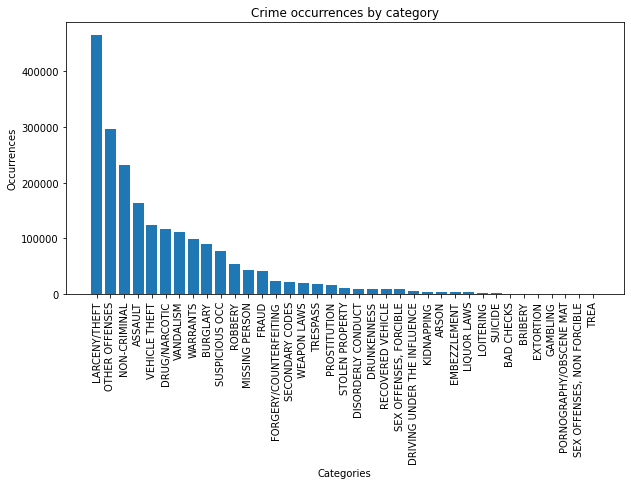

In [4]:
# exercise 2

# most commonly occuring category
crime_groups_desc = crime_groups.size().sort_values(ascending=False)
print(crime_groups_desc.axes[0][0])

# least commonly
crime_groups_asc = crime_groups.size().sort_values()
print(crime_groups_asc.axes[0][0])

# plot crimes over occurrences
fig, ax = plt.subplots()

ax.bar(crime_groups_desc.axes[0], crime_groups_desc)
ax.set_xlabel("Categories")
ax.set_ylabel("Occurrences")
ax.set_title("Crime occurrences by category")

fig.set_size_inches(10, 5)

plt.xticks(rotation=90)
plt.show()

In [1]:
# exercise 3

crime_data_per_year = crime_data.groupby(crime_data.Date.dt.year).size()

# year with the most crimes
print(crime_data_per_year.sort_values(ascending=False).axes[0][0])

# year with the least crimes
print(crime_data_per_year.sort_values(ascending=True).axes[0][0])

# average number of crimes per year
print(crime_data_per_year.mean(), end="\n\n")

# plot update
crime_group = crime_data.groupby(['Category', crime_data.Date.dt.year]).size()

avg_crimes_per_year = crime_group.groupby(level=0).mean().sort_values(ascending=False)

fig, ax = plt.subplots()

ax.bar(avg_crimes_per_year.axes[0], avg_crimes_per_year)
ax.set_xlabel("Categories")
ax.set_ylabel("Average")
ax.set_title("Average number of crimes per year by category")

fig.set_size_inches(10, 5)

plt.xticks(rotation=90)
plt.show()

NameError: name 'crime_data' is not defined

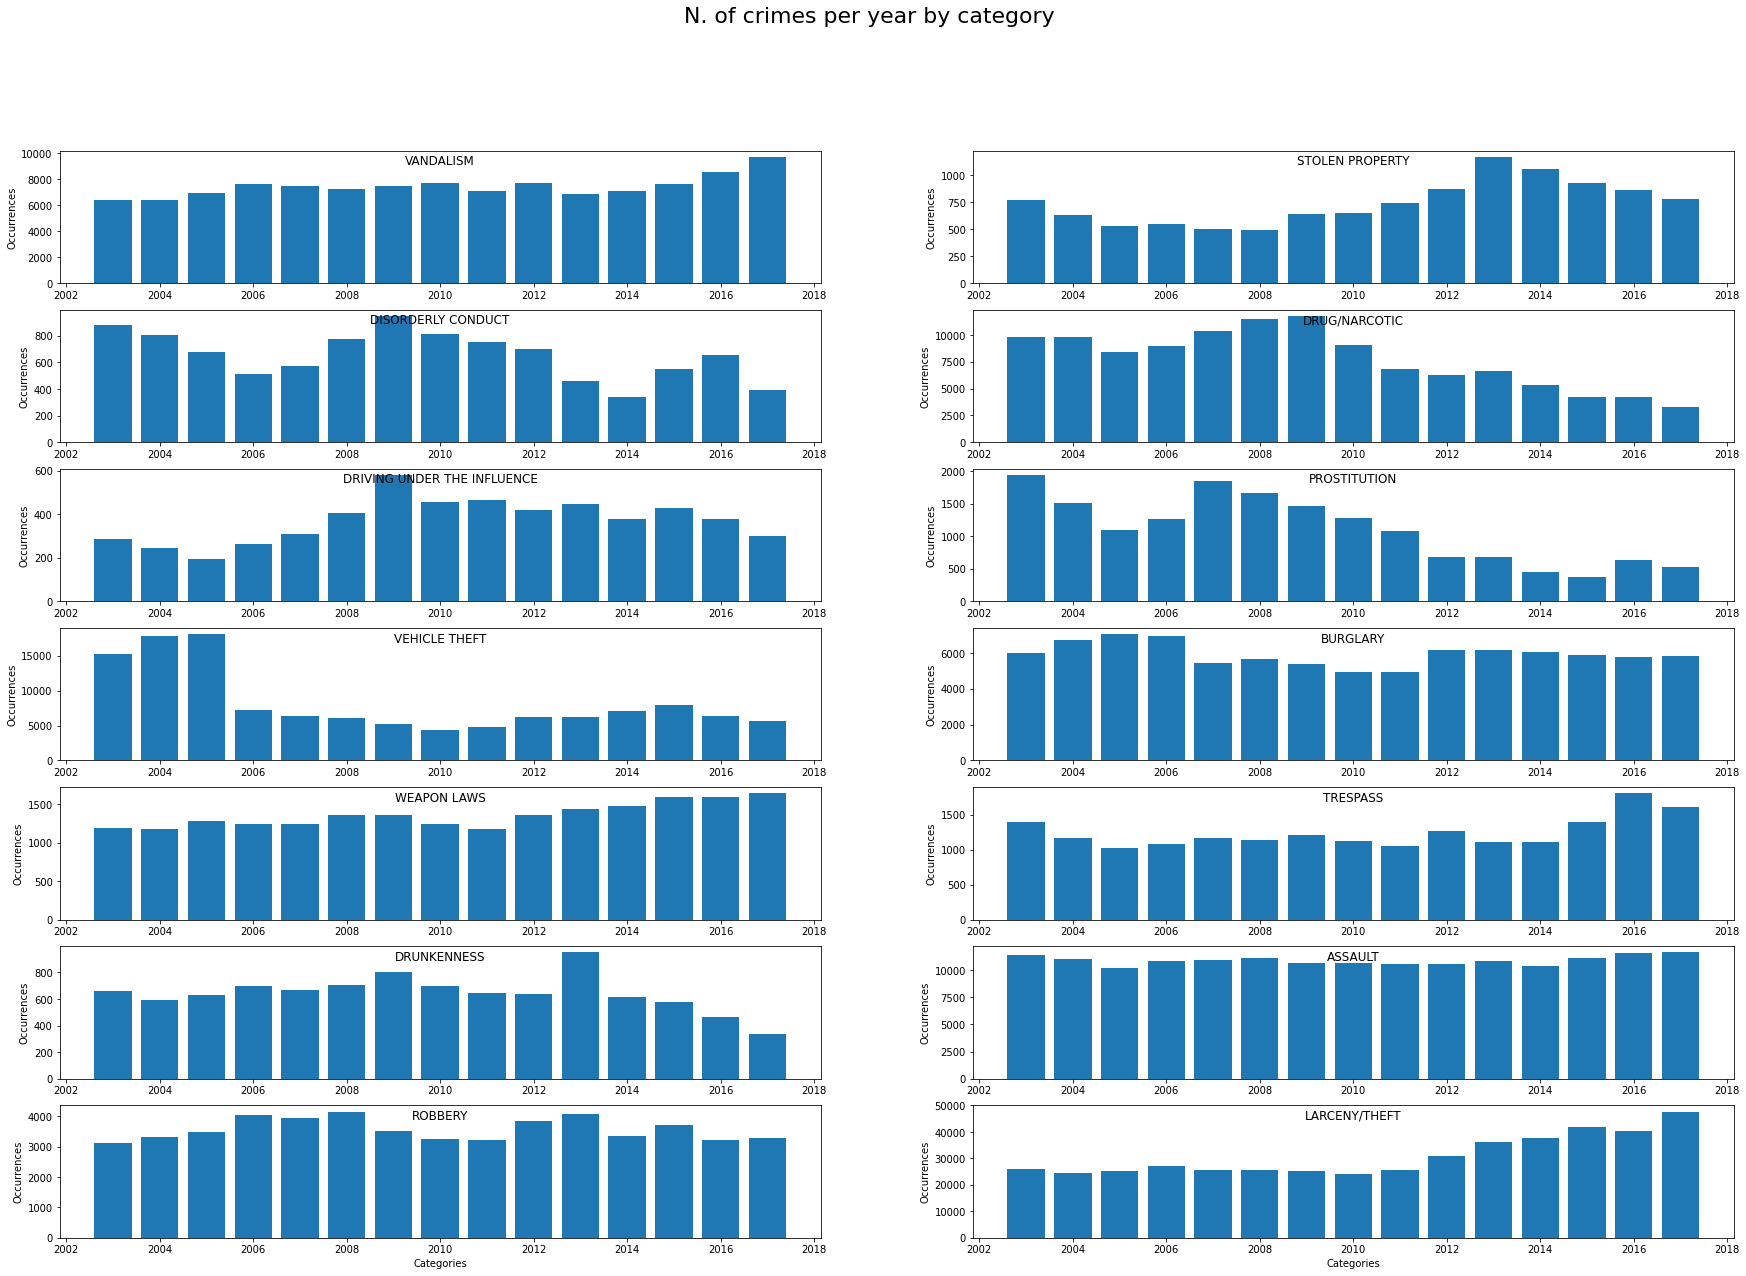

In [35]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

#focus crimes
fig, axs = plt.subplots(7,2, )

row = -1
for col, focuscrime in enumerate(focuscrimes):
    newline = col % 2 == 0
    row = row + 1 if newline else row
    col = 0 if newline else 1
    
    focuscrime_data = crime_group[focuscrime]
    
    axs[row][col].bar(focuscrime_data.axes[0], focuscrime_data)

    axs[6][col].set_xlabel("Categories")
    axs[row][col].set_ylabel("Occurrences")
    axs[row][col].set_title(focuscrime, y=1.0, pad = -14)

fig.suptitle("N. of crimes per year by category", fontsize=22)
fig.set_size_inches(30, 20)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

> * My plot looks like this for the 14 focus crimes:

  ![Barplots](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimesYearCategory.png)
>    
> (Note that titles are OVER the plots and the axes on the bottom are common for all plots.) 
> * Comment on at least three interesting trends in your plot. 
>    
> Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems' - get the full story [here](https://www.nytimes.com/2014/08/12/upshot/heres-why-stealing-cars-went-out-of-fashion.html). 

You've made it! You have successfully completed Lecture 1. If you didn't get enough, try to **personalize** your plots. We have already added titles, labels, etc., however, the look of default pandas plots is quite boring (that blue... and font... 😂). 